#**Requirement 1: Text classification**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading train data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets-data analysis/data/q1/train.csv')
df

,Id,Title,Content,Label
0,227464,"Netflix is coming to cable boxes, and Amazon i...",if you subscribe to one of three rinky-dink (...,Entertainment
1,244074,"Pharrell, Iranian President React to Tehran 'H...","pharrell, iranian president react to tehran '...",Entertainment
2,60707,Wildlife service seeks comments,the u.s. fish and wildlife service has reopen...,Technology
3,27883,Facebook teams up with Storyful to launch 'FB ...,the very nature of social media means it is o...,Technology
4,169596,Caesars plans US$880 mln New York casino,caesars plans us$880 mln new york casino jul ...,Business
...,...,...,...,...
111790,31462,Microsoft requires Office 2013 licensing for s...,in contrast to the muckle of special licenses...,Technology
111791,100821,Smallpox vials missing since 1950s found in la...,government workers at a research center near ...,Health
111792,86181,Scientists May Have Just Discovered the Key to...,harvard scientists may have just unlocked the...,Health
111793,256423,Justin Bieber to plead guilty to DUI,"justin bieber to plead guilty to duifri, 13 ju...",Entertainment


Loading test data

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/datasets-data analysis/data/q1/test_without_labels.csv')
df_test

,Id,Title,Content
0,262120,Tracy Morgan upgraded to fair condition after ...,actor and comedian tracy morgan has been upgr...
1,175132,Smartphones Weigh on Samsung Electronics as Gu...,samsung electronics co ltd on tuesday issued u...
2,218739,FBI denies fumbling testimony on 'X-Men' direc...,michael f. egan iii said in a press conferenc...
3,253483,Bachelorette 2014 Spoilers: Week 3 Recap ??? E...,i am having mixed emotions for what is about ...
4,224109,Barack Obama honours Frankie Knuckles in lette...,u.s. president barack obama has paid a specia...
...,...,...,...
47907,50348,"BMW, Tesla meet to discuss standardizing elect...","june 16, 2014 by edward taylor reutersan emplo..."
47908,255044,Harrison Ford has been filming the seventh Sta...,he may have helped save the galaxy from the ev...
47909,66502,"It's Games, Games, Games As Microsoft Plans To...",less than three months after microsoft had a ...
47910,10319,App Detail » Microsoft Excel for iPad,app description *** excel is ready for ipad p...


In [ ]:
df.Label.unique()

array(['Entertainment', 'Technology', 'Business', 'Health'], dtype=object)

Checking for duplicate rows

In [ ]:
df.duplicated().unique()

array([False])

# **Question 1a: ​Get to know the Data: WordCloud**

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["said", "say", "may", "says", "one", "even", "now", "well", "will"])

In [ ]:
#Splitting the dataset into three parts to obtain the dataset for each class
df1, df2, df3, df4 = [x for _, x in df.groupby(df['Label'])]
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3 = df3.reset_index(drop=True)
df4 = df4.reset_index(drop=True)
df1

,Id,Title,Content,Label
0,169596,Caesars plans US$880 mln New York casino,caesars plans us$880 mln new york casino jul ...,Business
1,122456,Tech sell-off in US sends world stocks markets...,"us stocks fell again today, with the s&p 500 ...",Business
2,169132,Europe approves credit line for Bulgarian banks,bulgaria's banking crisis eased today with fe...,Business
3,168009,Puerto Rico moves to refinance its debt,puerto rico paved the way to overhaul the fin...,Business
4,176943,Chocolate maker Lindt makes surprise move on U...,zurich: swiss chocolate maker chocoladefabrike...,Business
...,...,...,...,...
24829,174198,Terrifying moment two planes 'almost collided'...,the terrifying moment two planes appeared alm...,Business
24830,172279,Yellen sees little threat to financial stability,washington federal reserve chair janet yellen...,Business
24831,114285,Candy Crush Saga owner King valued at $7bn,"the owner of candy crush saga, king digital e...",Business
24832,148171,Russian Billionaire Divorce Settlement May Be ...,russian billionaire divorce settlement may be...,Business


In [ ]:
df3

,Id,Title,Content,Label
0,104941,No bun in the oven for panda that loves extra ...,mao mao and her cub mao ge appear at the chen...,Health
1,91277,Several Food Products Recalled This Week,this week witnessed recall of many food produc...,Health
2,99067,Calculating the strength of a drink,washington (ap) ??? how strong is that pina c...,Health
3,78403,Wearable blood monitor could predict heart att...,heart attacks could in future be predicted day...,Health
4,102894,West Nile Virus Hidden in Mosquito Bites,west nile virus hidden in mosquito bites july ...,Health
...,...,...,...,...
12015,87291,Wearable Technology Gets into Your Shirt; OMsi...,share this related posts wearable technology ...,Health
12016,72473,Storm-tossed Chimerix rushes into a pilot stud...,"chimerix ceo kenneth moch on tuesday morning, ...",Health
12017,84232,Deadly virus in Saudi Arabia could spread glob...,a deadly virus that is spreading at record sp...,Health
12018,100821,Smallpox vials missing since 1950s found in la...,government workers at a research center near ...,Health


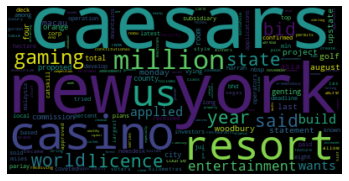

In [ ]:
# Start with one review:
text = df1.loc[0]['Content']

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
text1 = " ".join(r for r in df1['Title']+df1['Content'])
print ("There are {} words in the combination of all content for Business category.".format(len(text1)))

text2 = " ".join(r for r in df2['Title']+df2['Content'])
print ("There are {} words in the combination of all content for Entertainment category.".format(len(text2)))

text3 = " ".join(r for r in df3['Title']+df3['Content'])
print ("There are {} words in the combination of all content for Health category.".format(len(text3)))

text4 = " ".join(r for r in df4['Title']+df4['Content'])
print ("There are {} words in the combination of all content for Technology category.".format(len(text4)))

There are 71347324 words in the combination of all content for Business category.
There are 107181205 words in the combination of all content for Entertainment category.
There are 32956465 words in the combination of all content for Health category.
There are 79184049 words in the combination of all content for Technology category.


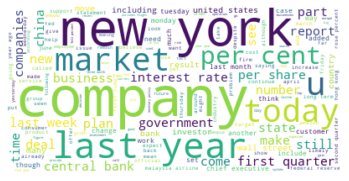

In [ ]:
# Generate a word cloud image
wordcloud1 = WordCloud(stopwords=stopwords, background_color="white").generate(text1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

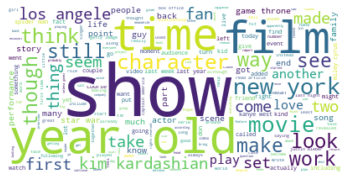

In [ ]:
# Generate a word cloud image
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white").generate(text2)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

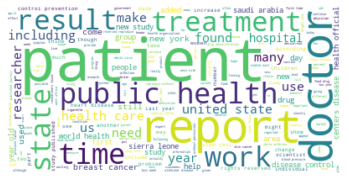

In [ ]:
# Generate a word cloud image
wordcloud3 = WordCloud(stopwords=stopwords, background_color="white").generate(text3)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

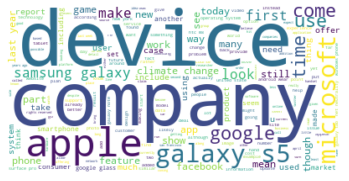

In [ ]:
# Generate a word cloud image
wordcloud4 = WordCloud(stopwords=stopwords, background_color="white").generate(text4)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Question 1b:​ Classification Task**

## **Data preprocessing using vectorizers**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 10000, stop_words = stopwords)

vectorizer.fit(df['Title']+df['Content'])


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'all', 'also', 'am', 'an', 'and', 'any', 'are',
                            "aren't", 'as', 'at', 'be', 'because', 'been',
                            'before', 'being', 'below', 'between', 'both',
                            'but', 'by', 'can', "can't", 'cannot', 'com', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
vectorized_content = vectorizer.transform(df['Content'])

In [ ]:
vectorized_content.shape

(111795, 10000)

In [ ]:
vectorized_content_test = vectorizer.transform(df_test['Content'])

In [ ]:
vectorized_content_test.shape

(47912, 10000)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features = 10000, ngram_range=(1,1), min_df=10,use_idf= True, stop_words = stopwords)
tfidf_vectorizer.fit(df['Title']+df['Content'])
print("some sample features(unique words in the corpus)",tfidf_vectorizer.get_feature_names()[0:10])
print('='*50)
tfidf_vect_content = tfidf_vectorizer.transform(df['Content'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


some sample features(unique words in the corpus) ['00', '000', '01', '02', '03', '04', '05', '06', '07', '08']


In [ ]:
tfidf_vect_content_test = tfidf_vectorizer.transform(df_test['Content'])

In [ ]:
print(tfidf_vect_content.shape)

(111795, 10000)


In [ ]:
print(tfidf_vect_content_test.shape)

(47912, 10000)


# Trancated SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=500)

svd_model.fit(vectorized_content)

data_svd = svd_model.transform(vectorized_content)

TruncatedSVD(algorithm='randomized', n_components=500, n_iter=5,
             random_state=None, tol=0.0)

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
tfidf_svd_model = TruncatedSVD(n_components=500)

tfidf_svd_model.fit(tfidf_vect_content)

TruncatedSVD(algorithm='randomized', n_components=500, n_iter=5,
             random_state=None, tol=0.0)

In [ ]:
X_tfidf = tfidf_svd_model.transform(tfidf_vect_content)

len(tfidf_svd_model.components_)

500

# Classification with 5-fold cross-validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score, precision_score

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


y = df['Label']
K = 5; # K fold cross validation

**Random Forest (BoW)**

In [ ]:
kf = KFold(n_splits=5)
X = tfidf_vect_content
kf.get_n_splits(X)
print(kf)

accuracy = 0
F1_score = 0
precision = 0
recall = 0

for train_index, test_index in kf.split(X):

  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy += accuracy_score(y_test, y_pred)
  F1_score += f1_score(y_test, y_pred, average='macro') 
  precision += precision_score(y_test, y_pred, average='macro')
  recall += recall_score(y_test, y_pred, average='macro')

print(accuracy/K, F1_score/K, precision/K, recall/K)

KFold(n_splits=5, random_state=None, shuffle=False)
0.9369113108815241 0.9306481840671893 0.9370792012123165 0.9248167736669679


**Random Forest (BoW) with Count vectorizer**

In [ ]:
kf = KFold(n_splits=5)
X = vectorized_content
kf.get_n_splits(X)
print(kf)

accuracy = 0
F1_score = 0
precision = 0
recall = 0

for train_index, test_index in kf.split(X):

  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy += accuracy_score(y_test, y_pred)
  F1_score += f1_score(y_test, y_pred, average='macro') 
  precision += precision_score(y_test, y_pred, average='macro')
  recall += recall_score(y_test, y_pred, average='macro')

print(accuracy/K, F1_score/K, precision/K, recall/K)

KFold(n_splits=5, random_state=None, shuffle=False)
0.9378684198756654 0.9321374022132796 0.9381555718572212 0.92664154959517


**Random Forest (SVD)**

In [ ]:
kf = KFold(n_splits=5)
X = X_tfidf
kf.get_n_splits(X)
print(kf)

accuracy = 0
F1_score = 0
precision = 0
recall = 0

for train_index, test_index in kf.split(X):

  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy += accuracy_score(y_test, y_pred)
  F1_score += f1_score(y_test, y_pred, average='macro') 
  precision += precision_score(y_test, y_pred, average='macro')
  recall += recall_score(y_test, y_pred, average='macro')

print(accuracy/K, F1_score/K, precision/K, recall/K)

KFold(n_splits=5, random_state=None, shuffle=False)
0.9518851469207033 0.9459845714230554 0.9507787444674201 0.9415693346003347


**Random Forest (SVD) with Count vectorizer**

In [ ]:
kf = KFold(n_splits=5)
X = data_svd
kf.get_n_splits(X)
print(kf)

accuracy = 0
F1_score = 0
precision = 0
recall = 0

for train_index, test_index in kf.split(X):

  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy += accuracy_score(y_test, y_pred)
  F1_score += f1_score(y_test, y_pred, average='macro') 
  precision += precision_score(y_test, y_pred, average='macro')
  recall += recall_score(y_test, y_pred, average='macro')

print(accuracy/K, F1_score/K, precision/K, recall/K)

KFold(n_splits=5, random_state=None, shuffle=False)
0.9206851827004787 0.9100149642444944 0.9237926469817515 0.8988540028106007


**SVM (BoW)**

In [ ]:
from sklearn.svm import SVC, LinearSVC

kf = KFold(n_splits=5)
X = tfidf_vect_content
kf.get_n_splits(X)
print(kf)

accuracy = 0
F1_score = 0
precision = 0
recall = 0

for train_index, test_index in kf.split(X):

  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = LinearSVC()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy += accuracy_score(y_test, y_pred)
  F1_score += f1_score(y_test, y_pred, average='macro') 
  precision += precision_score(y_test, y_pred, average='macro')
  recall += recall_score(y_test, y_pred, average='macro')

print(accuracy/K, F1_score/K, precision/K, recall/K)

KFold(n_splits=5, random_state=None, shuffle=False)
0.965400957108994 0.9622487497202009 0.9634358648501522 0.9610951176942713


**SVM (BoW) with Count vectorizer**

In [ ]:
from sklearn.svm import SVC, LinearSVC

kf = KFold(n_splits=5)
X = vectorized_content
kf.get_n_splits(X)
print(kf)

accuracy = 0
F1_score = 0
precision = 0
recall = 0

for train_index, test_index in kf.split(X):

  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = LinearSVC()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy += accuracy_score(y_test, y_pred)
  F1_score += f1_score(y_test, y_pred, average='macro') 
  precision += precision_score(y_test, y_pred, average='macro')
  recall += recall_score(y_test, y_pred, average='macro')

print(accuracy/K, F1_score/K, precision/K, recall/K)

KFold(n_splits=5, random_state=None, shuffle=False)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9465360704861577 0.9413339497291593 0.9421154100352828 0.9405737845261987


**SVM (SVD)**

In [ ]:
kf = KFold(n_splits=5)
X = X_tfidf
kf.get_n_splits(X)
print(kf)

accuracy = 0
F1_score = 0
precision = 0
recall = 0

for train_index, test_index in kf.split(X):

  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = LinearSVC()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy += accuracy_score(y_test, y_pred)
  F1_score += f1_score(y_test, y_pred, average='macro') 
  precision += precision_score(y_test, y_pred, average='macro')
  recall += recall_score(y_test, y_pred, average='macro')

print(accuracy/K, F1_score/K, precision/K, recall/K)

KFold(n_splits=5, random_state=None, shuffle=False)
0.9454984569971824 0.9394658290012032 0.9419614425868053 0.9370936541573872


**SVM (SVD) with Count vectorizer**

In [ ]:
kf = KFold(n_splits=5)
X = data_svd
kf.get_n_splits(X)
print(kf)

accuracy = 0
F1_score = 0
precision = 0
recall = 0

for train_index, test_index in kf.split(X):

  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = LinearSVC()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy += accuracy_score(y_test, y_pred)
  F1_score += f1_score(y_test, y_pred, average='macro') 
  precision += precision_score(y_test, y_pred, average='macro')
  recall += recall_score(y_test, y_pred, average='macro')

print(accuracy/K, F1_score/K, precision/K, recall/K)

KFold(n_splits=5, random_state=None, shuffle=False)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.9323851692830628 0.9254478045984218 0.9298115454887709 0.9214333662617961


**KNN (BoW)**

In [ ]:
kf = KFold(n_splits=5)
X = tfidf_vect_content
kf.get_n_splits(X)
print(kf)

accuracy = 0
F1_score = 0
precision = 0
recall = 0

for train_index, test_index in kf.split(X):

  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = KNeighborsClassifier(n_neighbors=5)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy += accuracy_score(y_test, y_pred)
  F1_score += f1_score(y_test, y_pred, average='macro') 
  precision += precision_score(y_test, y_pred, average='macro')
  recall += recall_score(y_test, y_pred, average='macro')

print(accuracy/K, F1_score/K, precision/K, recall/K)

KFold(n_splits=5, random_state=None, shuffle=False)
0.9692651728610402 0.9660231534134711 0.9667665258446689 0.9653094053688743


**KNN (BoW) with Count vectorizer**

In [ ]:
kf = KFold(n_splits=5)
X = vectorized_content
kf.get_n_splits(X)
print(kf)

accuracy = 0
F1_score = 0
precision = 0
recall = 0

for train_index, test_index in kf.split(X):

  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = KNeighborsClassifier(n_neighbors=5)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy += accuracy_score(y_test, y_pred)
  F1_score += f1_score(y_test, y_pred, average='macro') 
  precision += precision_score(y_test, y_pred, average='macro')
  recall += recall_score(y_test, y_pred, average='macro')

print(accuracy/K, F1_score/K, precision/K, recall/K)

KFold(n_splits=5, random_state=None, shuffle=False)
0.9019723601234402 0.8963981635110304 0.9043289009607708 0.8920452482999442


**KNN (SVD)**

In [ ]:
kf = KFold(n_splits=5)
X = X_tfidf
kf.get_n_splits(X)
print(kf)

accuracy = 0
F1_score = 0
precision = 0
recall = 0

for train_index, test_index in kf.split(X):

  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = KNeighborsClassifier(n_neighbors=5)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy += accuracy_score(y_test, y_pred)
  F1_score += f1_score(y_test, y_pred, average='macro') 
  precision += precision_score(y_test, y_pred, average='macro')
  recall += recall_score(y_test, y_pred, average='macro')

print(accuracy/K, F1_score/K, precision/K, recall/K)

KFold(n_splits=5, random_state=None, shuffle=False)
0.9633167851871729 0.9602649757713827 0.9628701455696275 0.9577879263908253


**KNN (SVD) with Count vectorizer**

In [ ]:
kf = KFold(n_splits=5)
X = data_svd
kf.get_n_splits(X)
print(kf)

accuracy = 0
F1_score = 0
precision = 0
recall = 0

for train_index, test_index in kf.split(X):

  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = KNeighborsClassifier(n_neighbors=5)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy += accuracy_score(y_test, y_pred)
  F1_score += f1_score(y_test, y_pred, average='macro') 
  precision += precision_score(y_test, y_pred, average='macro')
  recall += recall_score(y_test, y_pred, average='macro')

print(accuracy/K, F1_score/K, precision/K, recall/K)

KFold(n_splits=5, random_state=None, shuffle=False)
0.9325461782727313 0.9261377611835074 0.9280790021025558 0.9246585307067041


# **Labelling the test set**

In [ ]:
final_model = KNeighborsClassifier(n_neighbors=5)
final_model.fit(tfidf_vect_content, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
final_predictions = final_model.predict(tfidf_vect_content_test)

In [ ]:
final_output = pd.DataFrame({

    "Id": df_test["Id"], 
    "Predicted": final_predictions})

final_output

,Id,Predicted
0,262120,Entertainment
1,175132,Business
2,218739,Entertainment
3,253483,Entertainment
4,224109,Entertainment
...,...,...
47907,50348,Technology
47908,255044,Entertainment
47909,66502,Technology
47910,10319,Technology


In [ ]:
final_output.to_csv('/content/drive/MyDrive/datasets-data analysis/data/q1/testSet_categories.csv', sep=',', index=False)